In [1]:
import random
import numpy as np
from math import floor
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report

#use scikit-learn's digits toy dataset
digits = datasets.load_digits()
print(f'There are {digits.data.shape[0]} training examples and {digits.data.shape[1]} features')

There are 1797 training examples and 64 features


In [2]:
#80% training data, 10% CV data, 10% test data
np.random.permutation(digits.data)
train_images = digits.data[:floor(len(digits.images) * .8), :]
CV_images = digits.data[floor(len(digits.images) * .8): floor(len(digits.images) * .9), :]
test_images = digits.data[floor(len(digits.images) * .9):, :]
train_target = digits.target[:floor(len(digits.images) * .8)]
CV_target = digits.target[floor(len(digits.images) * .8): floor(len(digits.images) * .9)]
test_target = digits.target[floor(len(digits.images) * .9):]

In [3]:
#Train parameters
svc = svm.SVC(2)
fit = svc.fit(np.array(train_images).reshape(-1,64), train_target)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass C=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [4]:
#Evaluate on test set
test_predictions = svc.predict(test_images)
print('Report:', classification_report(test_target, test_predictions))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17
           3       1.00      0.67      0.80        18
           4       1.00      0.90      0.95        20
           5       0.86      1.00      0.92        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.77      1.00      0.87        17
           9       0.89      0.89      0.89        18

    accuracy                           0.94       180
   macro avg       0.95      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



The number we are predicting is 5
SVC predicts: [5]


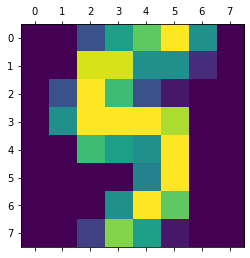

In [5]:
#Predict and visualize given number numIndex
#numIndex is index in digits dataset ranging from 0 to 1797
numIndex = 1700
num = digits.images[numIndex]
print('The number we are predicting is', digits.target[numIndex])
plt.matshow(num)
print('SVC predicts:', svc.predict(np.array(digits.images[numIndex]).reshape(-1, 64)))